# CAR PRICE PREDICTION MODEL - MACHINE LEARNING PROJECT

# NAME - SOORAJ ARUN

# 1. OVERVIEW OF PROBLEM STATEMENT:
By manufacturing cars locally, a Chinese automaker desires to compete with American and European brands and gain a foothold in the US market. Success depends on knowing the variables affecting US auto prices, which are different from those in the Chinese market. In order to determine the factors that have a significant impact on car prices and comprehend how these factors affect pricing, the company has hired a consulting firm to examine a dataset of different cars from the American market. In order to attain competitive pricing, the company's product design and market entry strategy will be guided by this insight.

# 2. OBJECTIVE: 
The objective of this project is to create a regression model that uses a number of independent variables to forecast car prices in the US market. The company will be able to create competitive automobiles and successful business plans with the aid of this model, which will assist in identifying important factors affecting auto prices and explaining how they relate to pricing.

# 3. DATA DESCRIPTION:
Source: https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link


Car_ID, CarName, fuel type, aspiration, door number, carbody, drivewheel, engine location, wheelbase, carlength, carwidth, carheight, curbweight, engine type, cylinder number, enginesize, fuel system, boreratio, stroke, compression ratio, horsepower, peak rpm, city mpg, highway mpg, and price are among the features.


### Importing Libraries

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV

import joblib
import warnings
warnings.filterwarnings("ignore")

### 4. Importing Data

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df = pd.DataFrame(data)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
df.shape

(205, 26)

In [15]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### 5.Data preprocessing and Data cleaning

In [17]:
# Checking for duplicate
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [19]:
df.duplicated().sum()

0

NO DUPLICATES FOUND

In [21]:
# Checking for null values
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

NO NULL VALUES FOUND

#### CLASSIFYING COLUMNS

In [25]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print("numerical columns: ",numerical_columns)
print("Categorical columns: ",categorical_columns)

numerical columns:  Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Categorical columns:  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


#### OUTLIER DETECTION

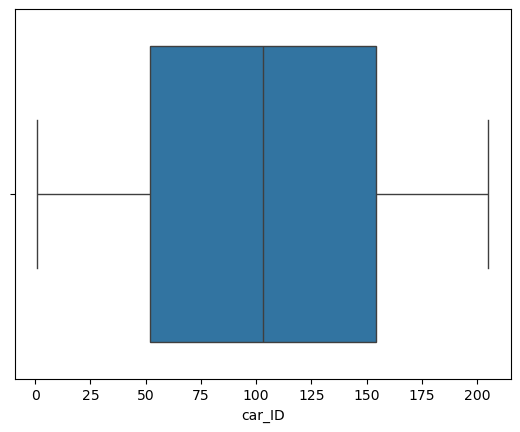

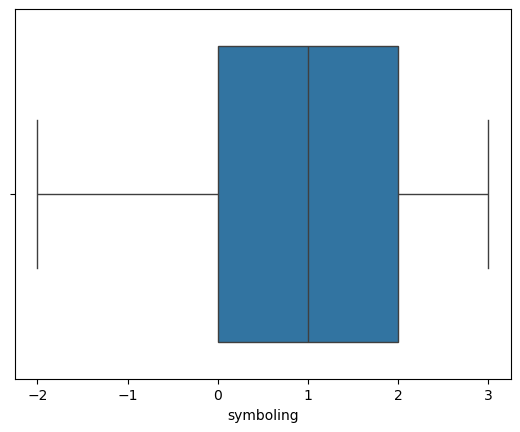

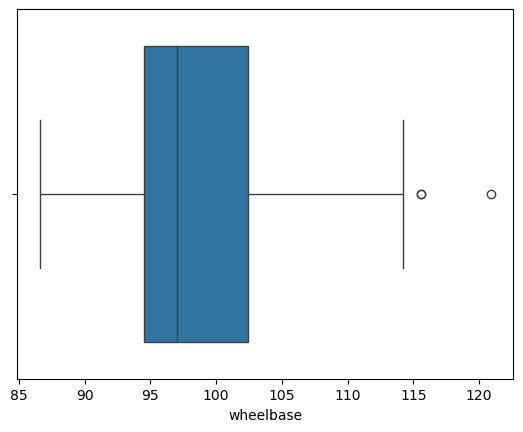

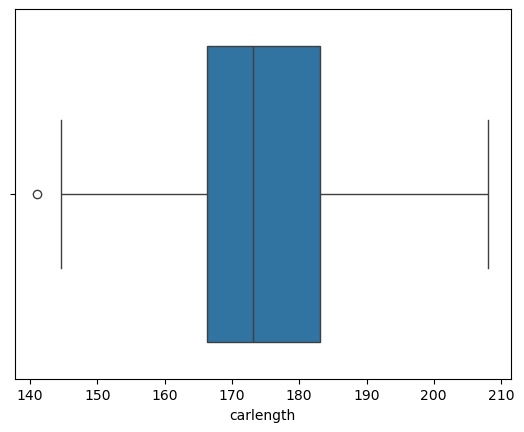

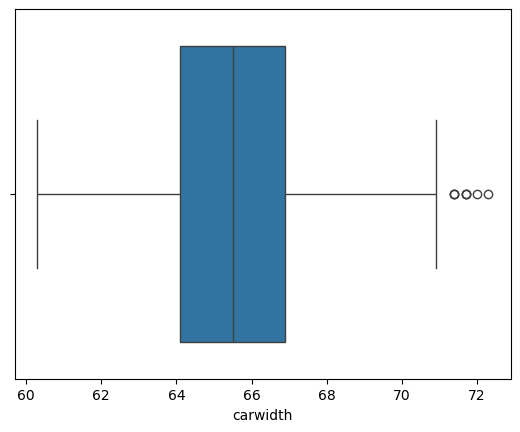

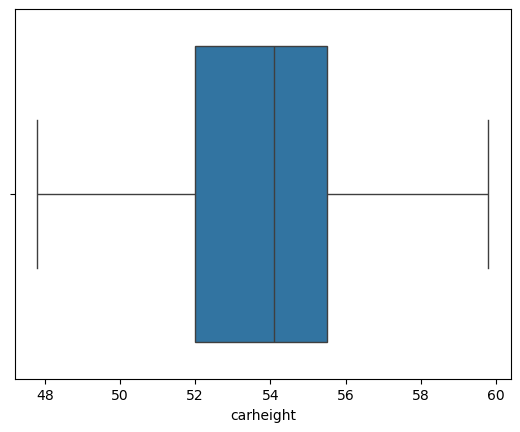

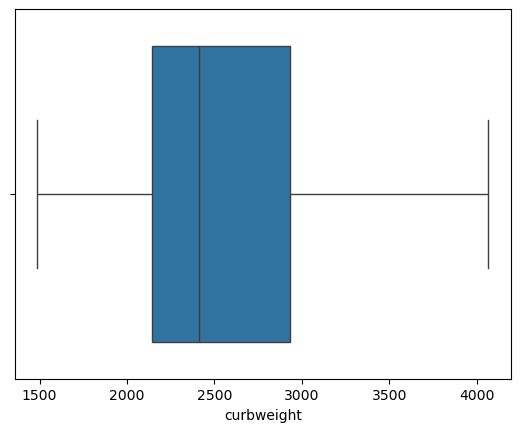

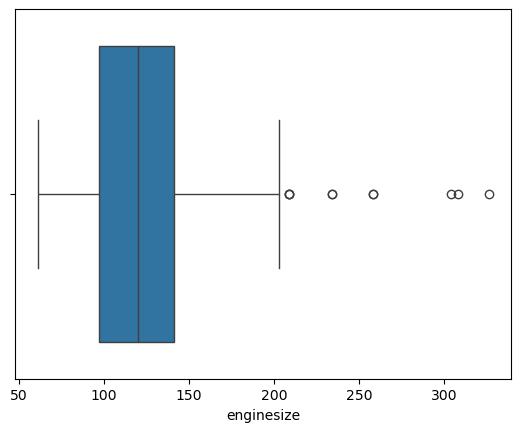

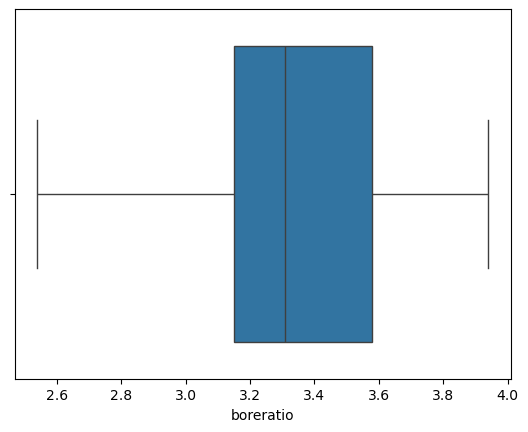

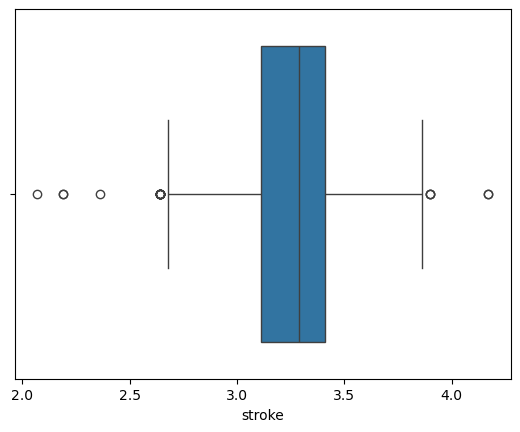

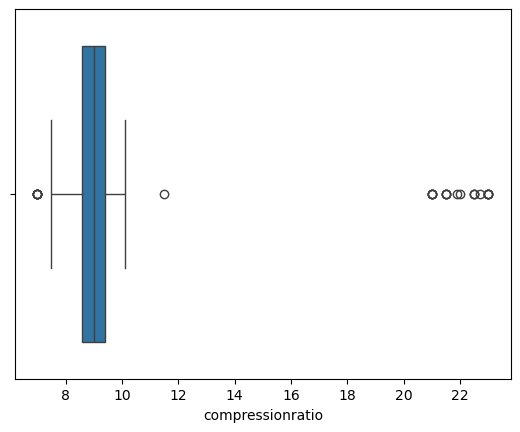

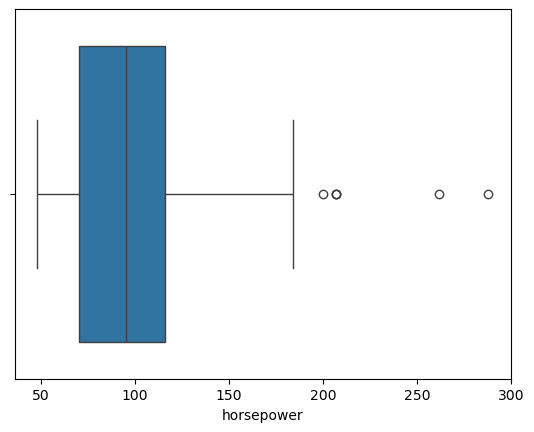

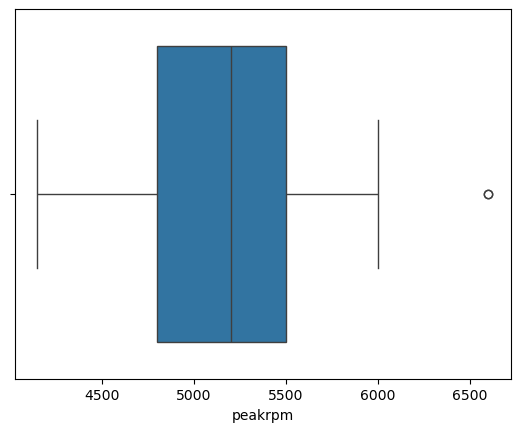

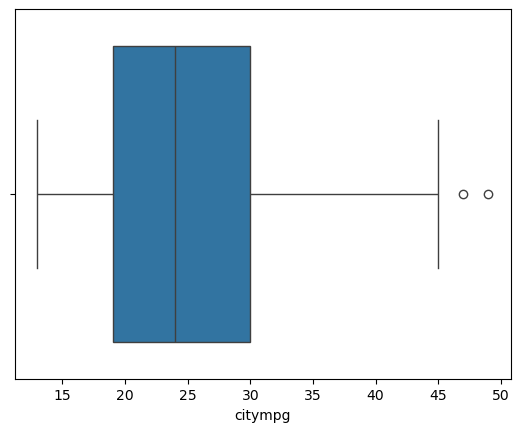

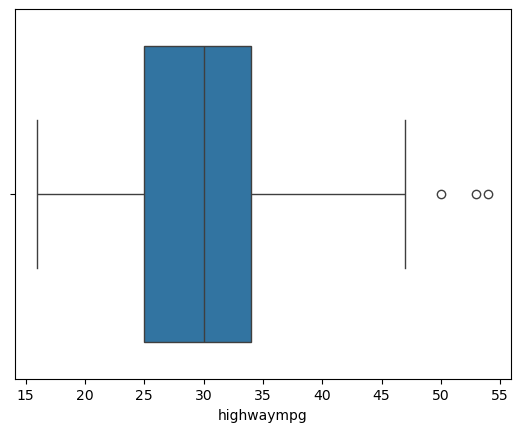

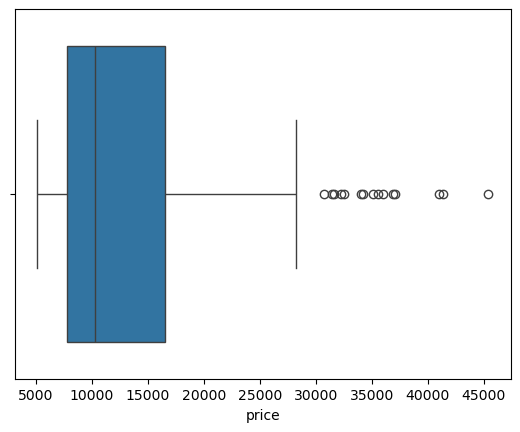

In [27]:
# boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'car_ID'),
  Text(1, 0, 'symboling'),
  Text(2, 0, 'wheelbase'),
  Text(3, 0, 'carlength'),
  Text(4, 0, 'carwidth'),
  Text(5, 0, 'carheight'),
  Text(6, 0, 'curbweight'),
  Text(7, 0, 'enginesize'),
  Text(8, 0, 'boreratio'),
  Text(9, 0, 'stroke'),
  Text(10, 0, 'compressionratio'),
  Text(11, 0, 'horsepower'),
  Text(12, 0, 'peakrpm'),
  Text(13, 0, 'citympg'),
  Text(14, 0, 'highwaympg'),
  Text(15, 0, 'price')])

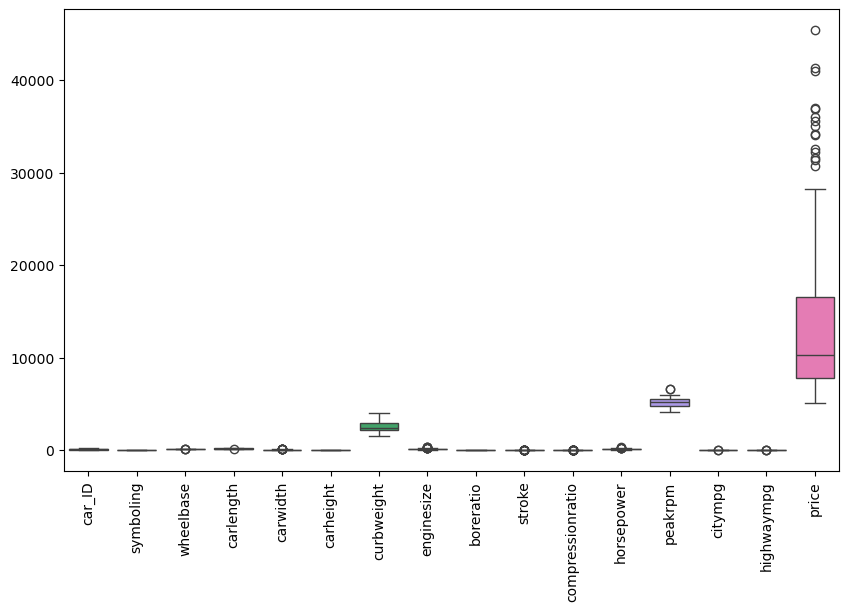

In [29]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10,6))
sns.boxplot(data = df[numerical_columns])
plt.xticks(rotation=90)

OUTLIERS FOUND

#### IQR METHOD

In [31]:
# List of features with potential outliers
features = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke', 
            'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Function to apply IQR method to fix outliers
def fix_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    
    return df


df = fix_outliers_iqr(df, features)

#### VISUALISING AFTER OUTLIER DETECTION

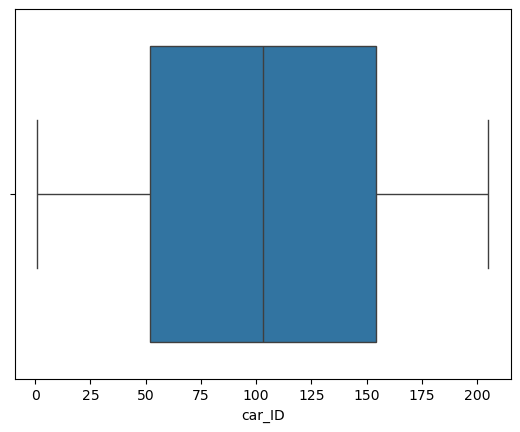

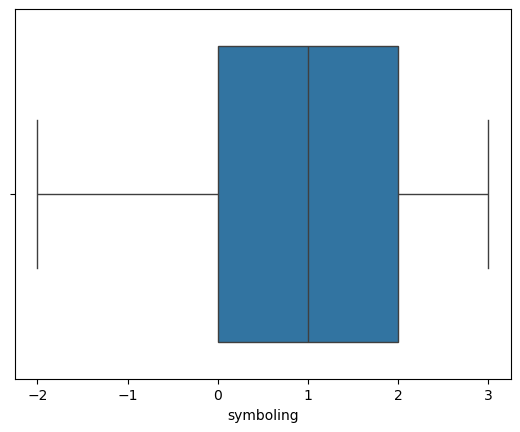

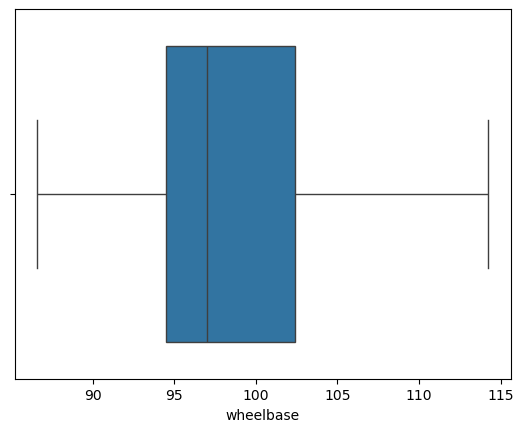

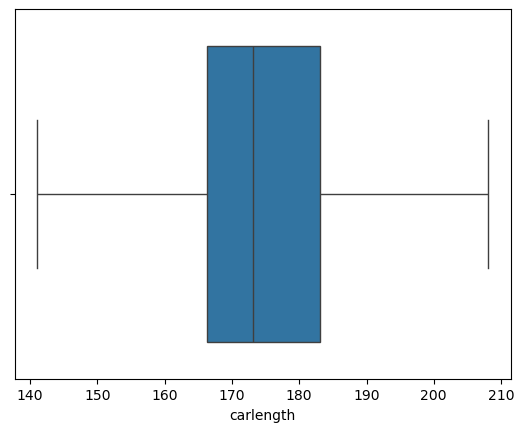

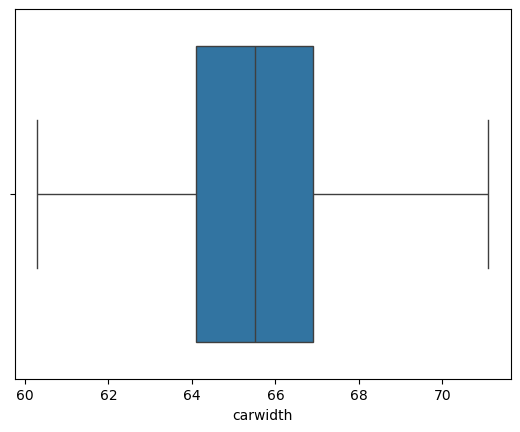

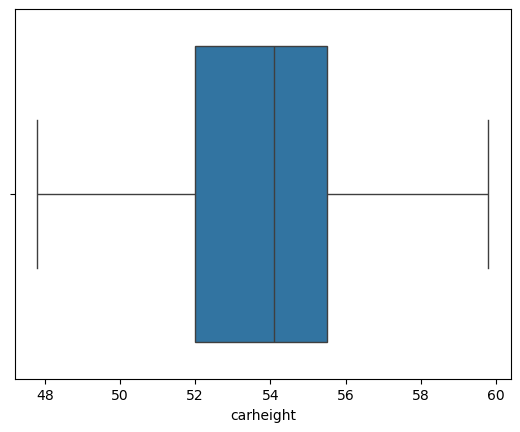

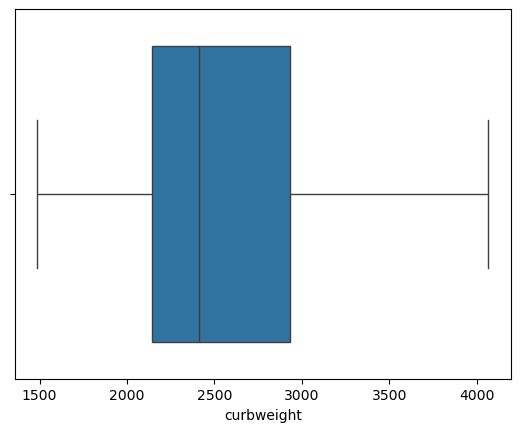

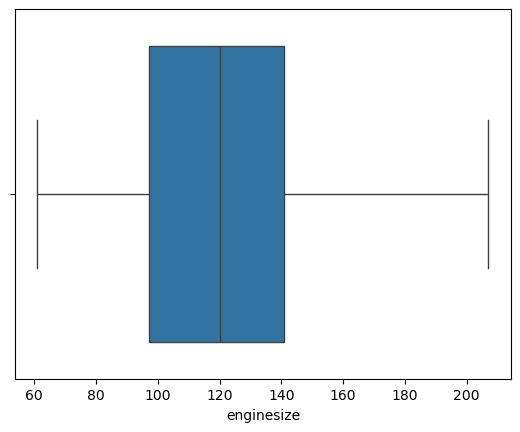

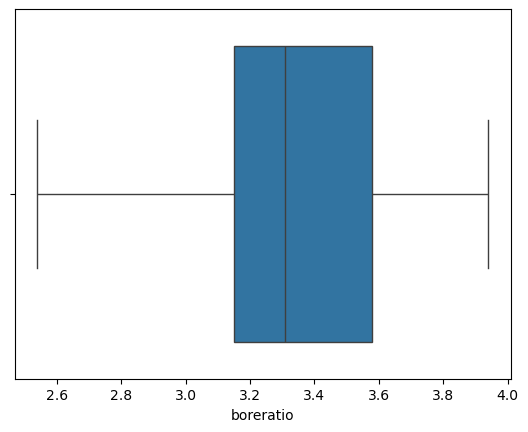

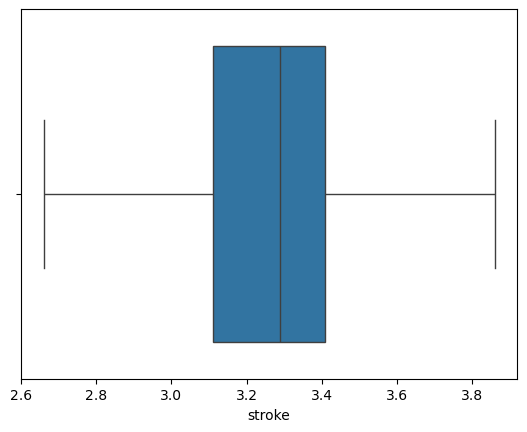

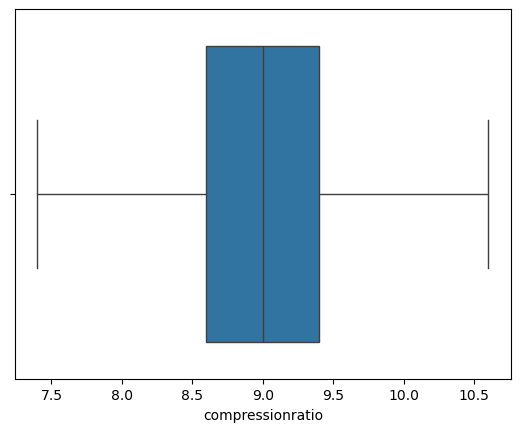

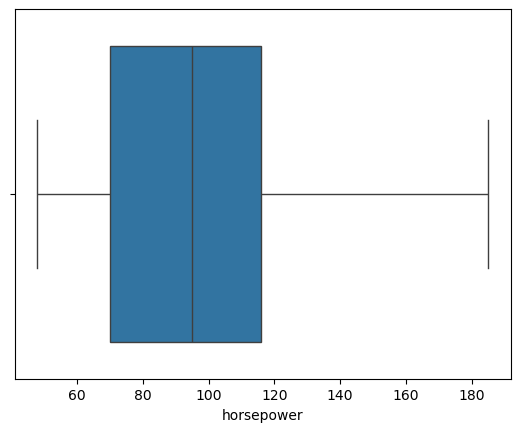

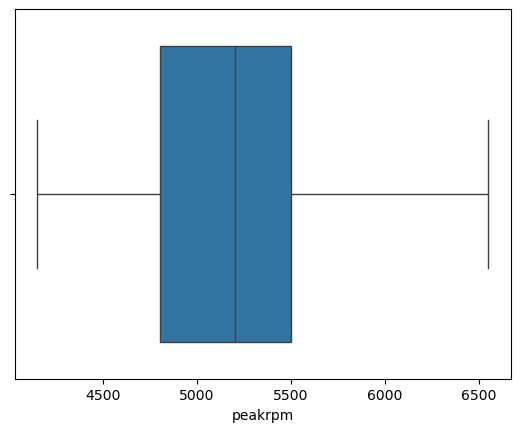

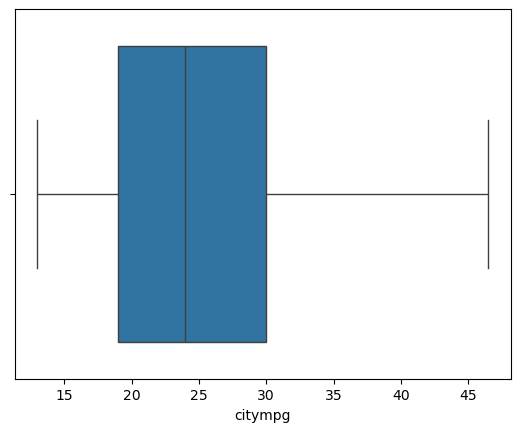

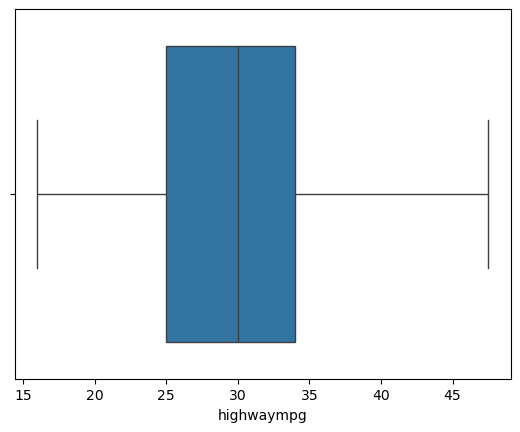

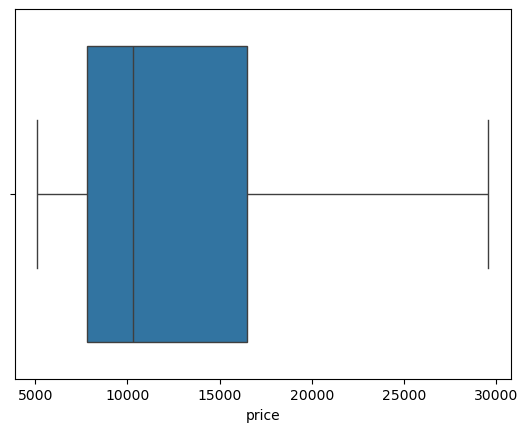

In [33]:
# boxplot to identify outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df,x=i)
    plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'car_ID'),
  Text(1, 0, 'symboling'),
  Text(2, 0, 'wheelbase'),
  Text(3, 0, 'carlength'),
  Text(4, 0, 'carwidth'),
  Text(5, 0, 'carheight'),
  Text(6, 0, 'curbweight'),
  Text(7, 0, 'enginesize'),
  Text(8, 0, 'boreratio'),
  Text(9, 0, 'stroke'),
  Text(10, 0, 'compressionratio'),
  Text(11, 0, 'horsepower'),
  Text(12, 0, 'peakrpm'),
  Text(13, 0, 'citympg'),
  Text(14, 0, 'highwaympg'),
  Text(15, 0, 'price')])

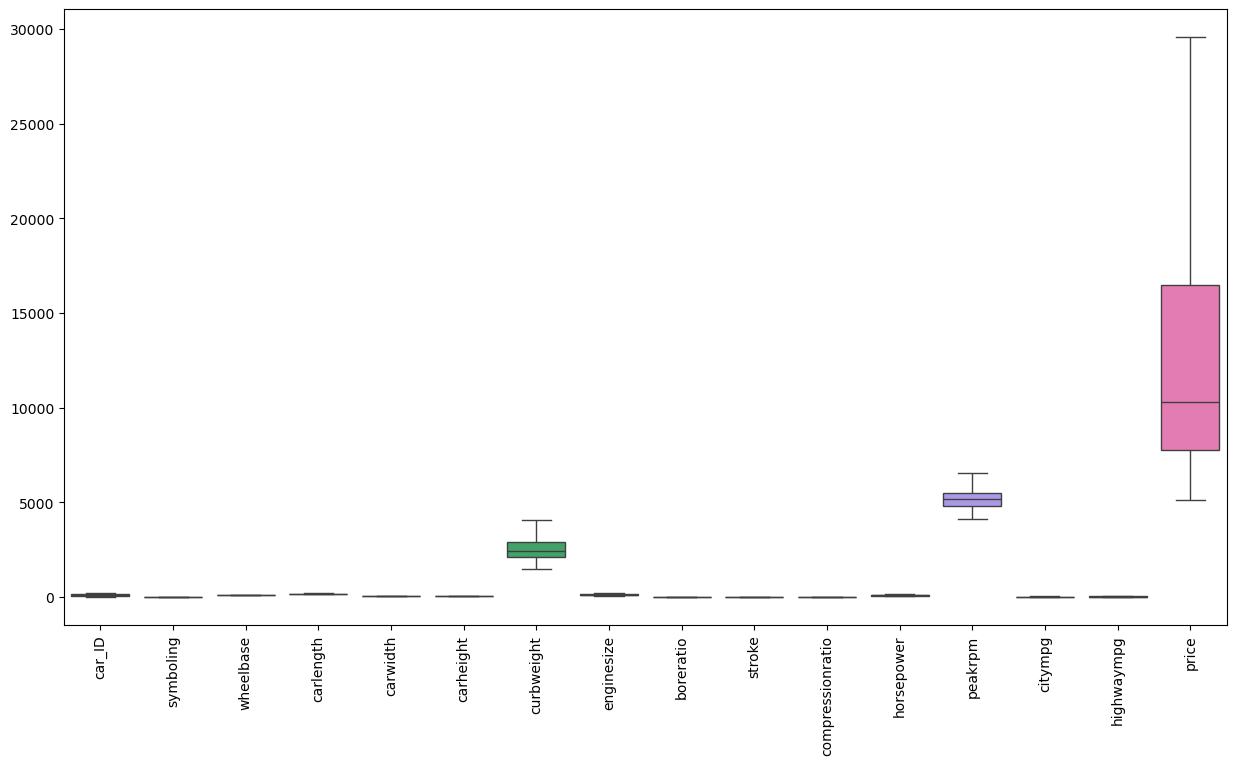

In [35]:
numerical_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,8))
sns.boxplot(data = df[numerical_columns])
plt.xticks(rotation=90)

#### CHECKING SKEW

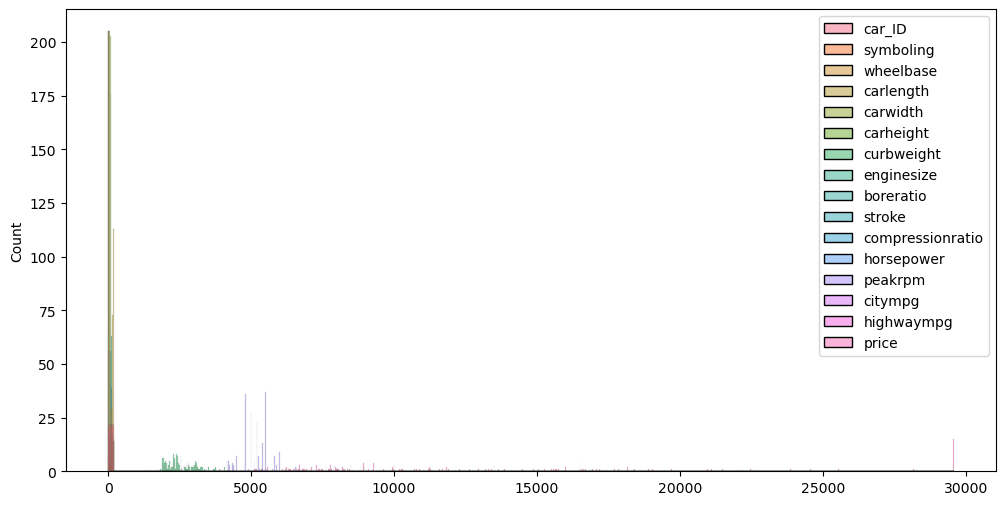

In [41]:
# visualising
plt.figure(figsize=(12,6))
sns.histplot(df[numerical_columns])
plt.show()

In [38]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.924916
carlength           0.155954
carwidth            0.776278
carheight           0.063123
curbweight          0.681398
enginesize          0.908453
boreratio           0.020156
stroke             -0.379130
compressionratio    0.035149
horsepower          0.814957
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               1.222031
dtype: float64

<Axes: xlabel='price', ylabel='Density'>

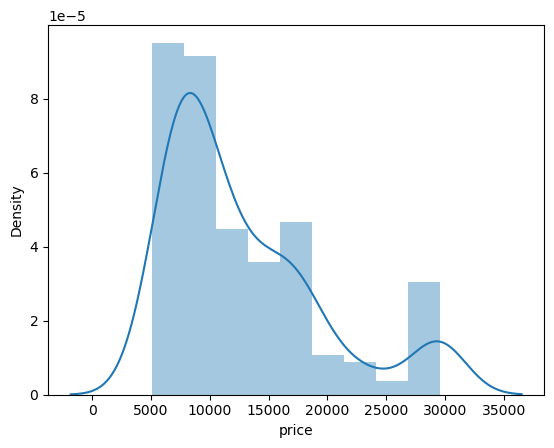

In [44]:
sns.distplot(df['price'])


SKEWNESS IS HIGH FOR 'PRICE'

#### SKEWNESS IS FIXED BY USING LOG TRANSFORMATION

In [46]:
df['price'] = np.log(df['price'])
df['wheelbase'] = np.log(df['wheelbase'])
df['carwidth'] = np.log(df['carwidth'])
df['enginesize'] = np.log(df['enginesize'])
df['compressionratio'] = np.log(df['compressionratio'])
df['horsepower'] = np.log(df['horsepower'])

In [48]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.781960
carlength           0.155954
carwidth            0.696287
carheight           0.063123
curbweight          0.681398
enginesize          0.401418
boreratio           0.020156
stroke             -0.379130
compressionratio   -0.241483
horsepower          0.287093
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               0.459254
dtype: float64

In [50]:
df['compressionratio'] = np.sqrt(df['compressionratio'])
df['wheelbase'] = np.sqrt(df['wheelbase'])

In [52]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.766142
carlength           0.155954
carwidth            0.696287
carheight           0.063123
curbweight          0.681398
enginesize          0.401418
boreratio           0.020156
stroke             -0.379130
compressionratio   -0.304199
horsepower          0.287093
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               0.459254
dtype: float64

<Axes: xlabel='price', ylabel='Density'>

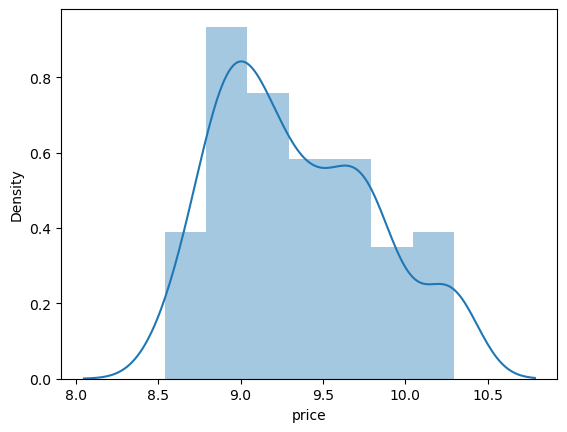

In [54]:
sns.distplot(df['price'])

In [56]:
df[numerical_columns].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           0.766142
carlength           0.155954
carwidth            0.696287
carheight           0.063123
curbweight          0.681398
enginesize          0.401418
boreratio           0.020156
stroke             -0.379130
compressionratio   -0.304199
horsepower          0.287093
peakrpm             0.049935
citympg             0.604594
highwaympg          0.347441
price               0.459254
dtype: float64

### 6. EDA

In [58]:
df1 = df.copy()

In [60]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.510075
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.711116
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,2.132745,...,5.023881,mpfi,2.68,3.47,1.482304,5.036953,5000.0,19.0,26.0,9.711116
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,2.145500,...,4.691348,mpfi,3.19,3.40,1.517427,4.624973,5500.0,24.0,30.0,9.543235
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,2.144563,...,4.912655,mpfi,3.19,3.40,1.442027,4.744932,5500.0,18.0,22.0,9.767095


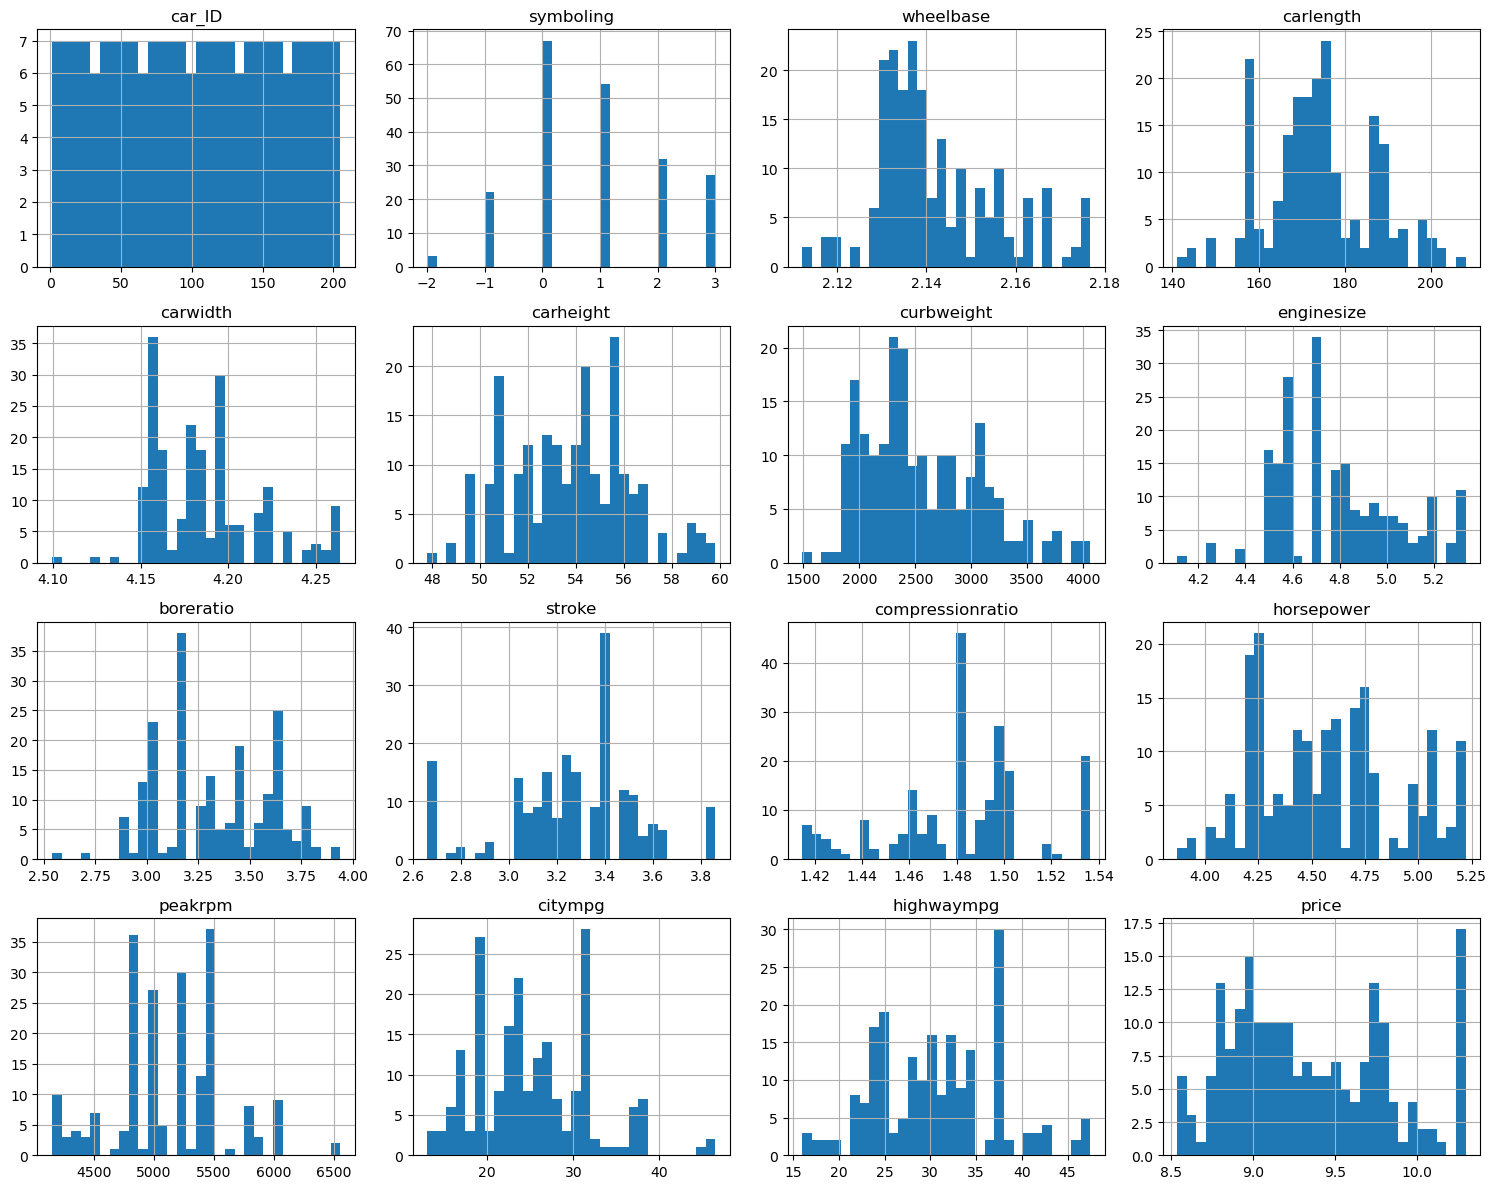

In [63]:
# Histogram
df1.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

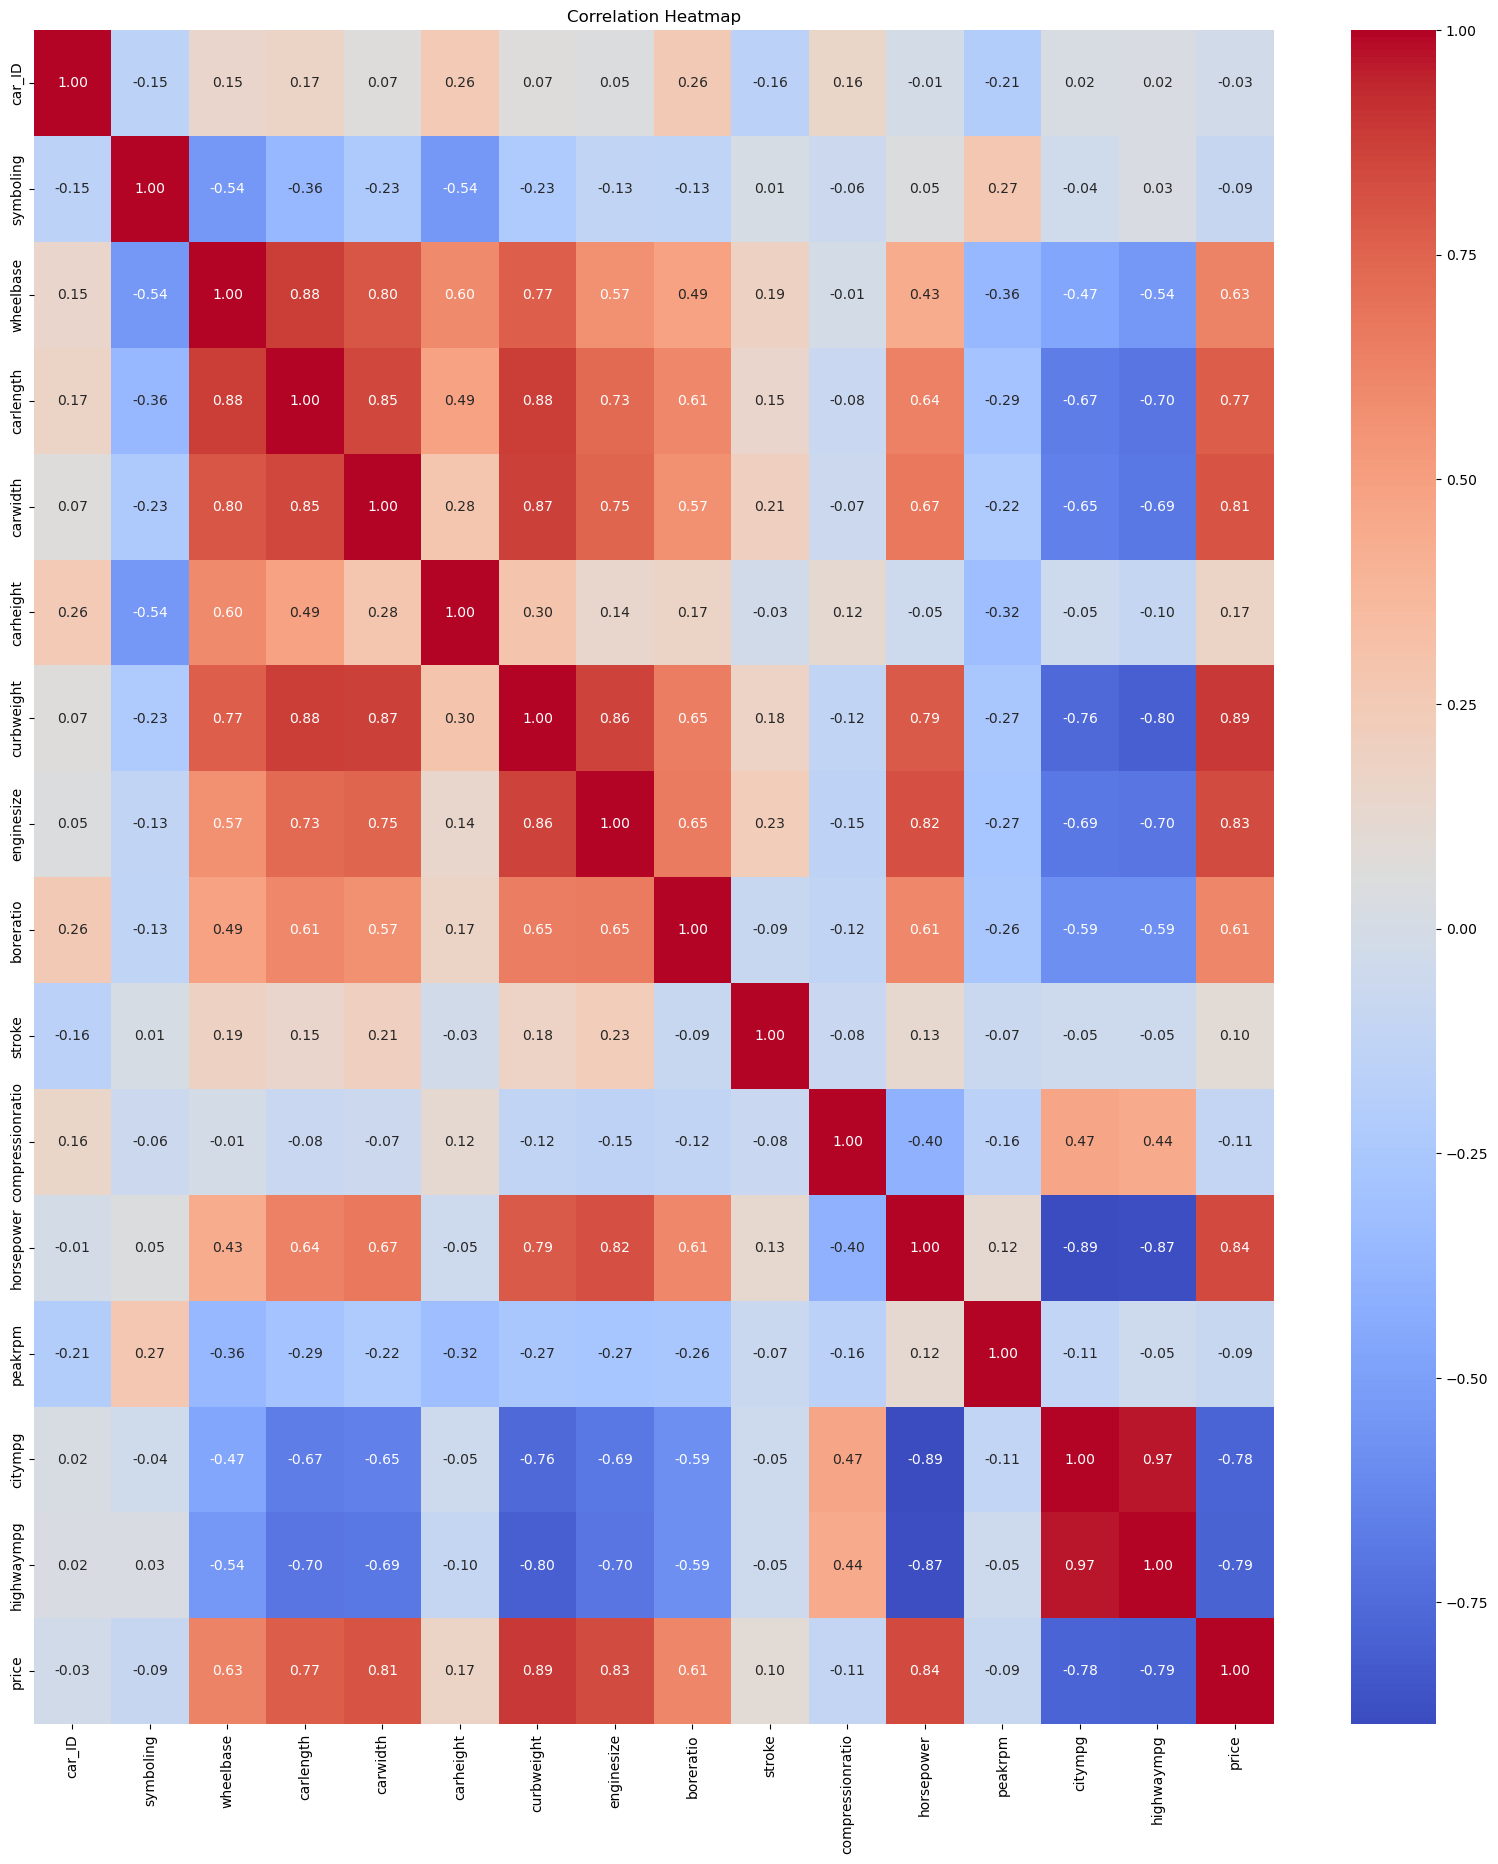

In [65]:
#Compute correlation matrix
corr_matrix = df1[numerical_columns].corr()

# Heatmap
plt.figure(figsize=(20, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

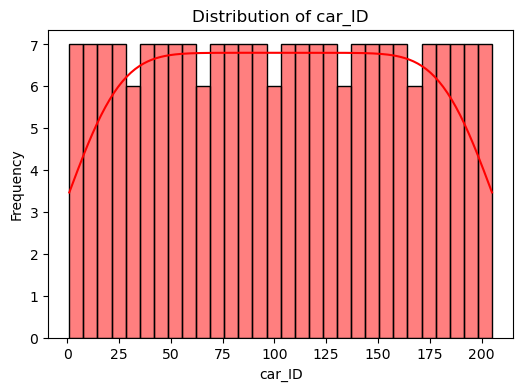

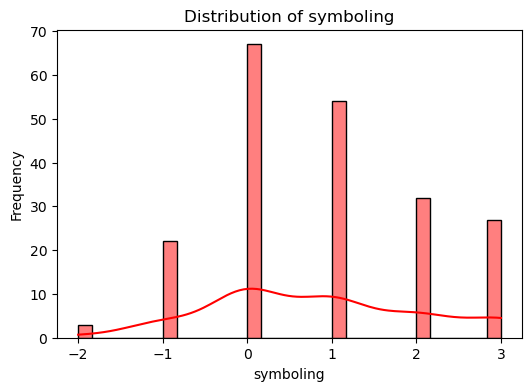

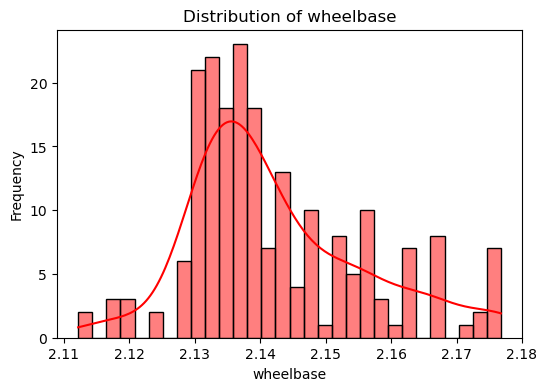

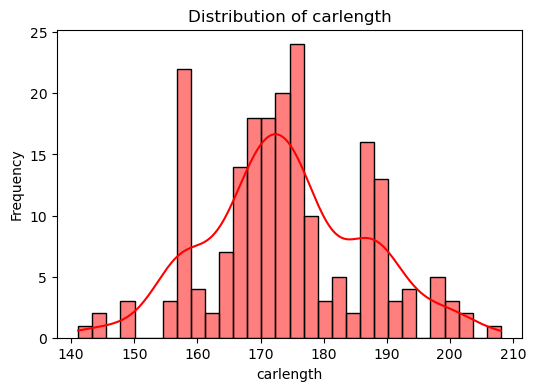

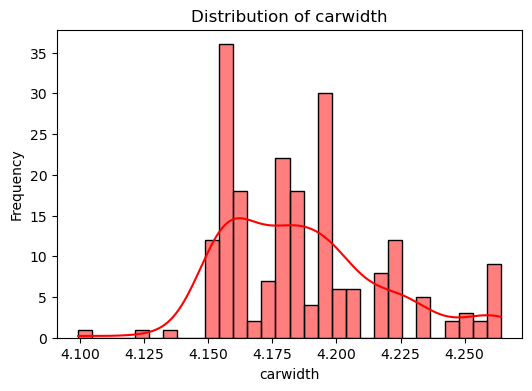

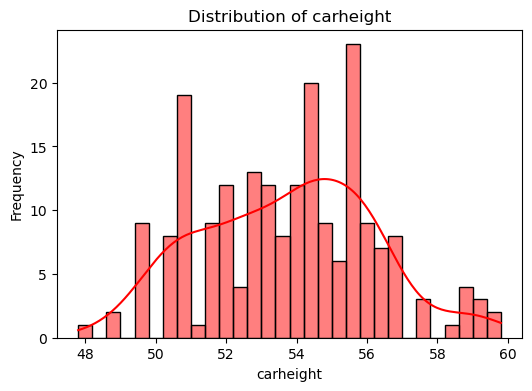

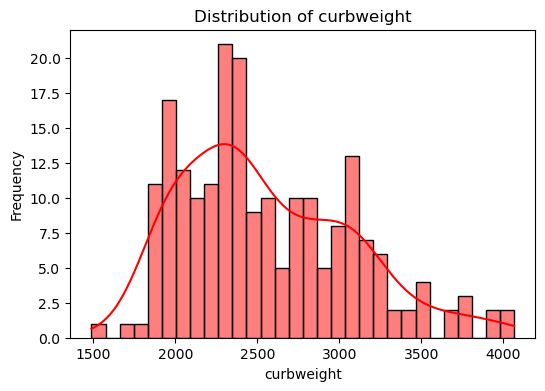

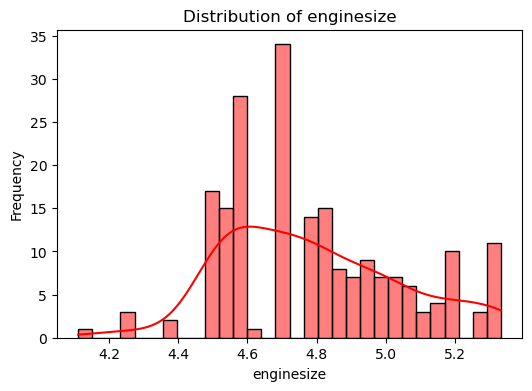

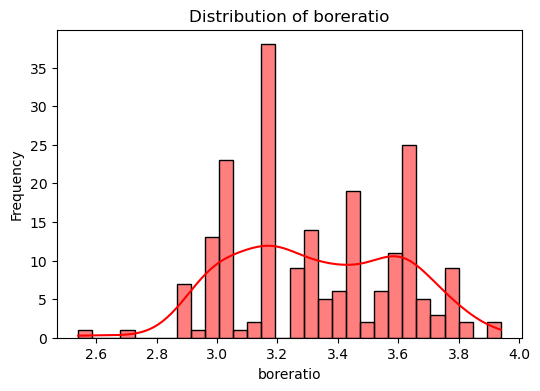

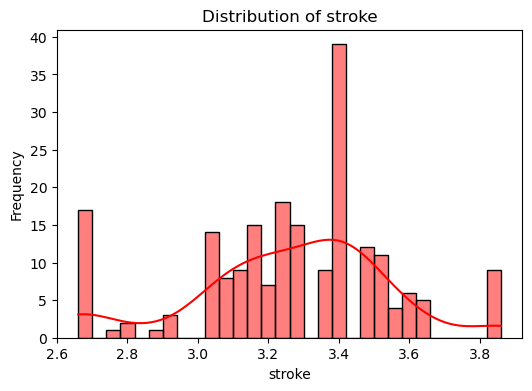

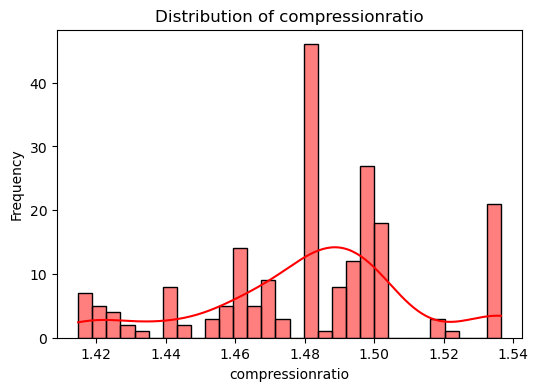

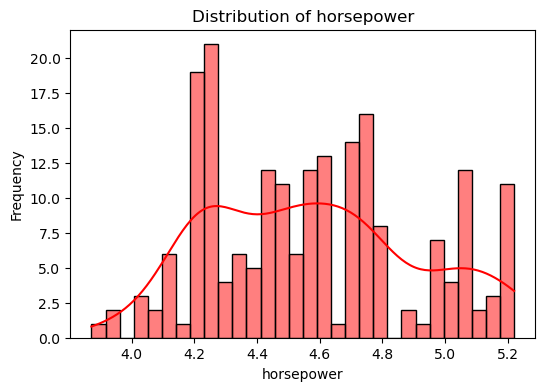

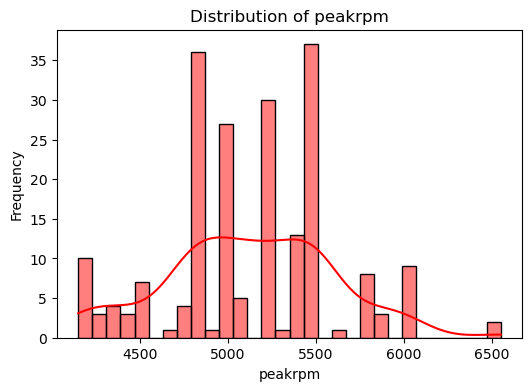

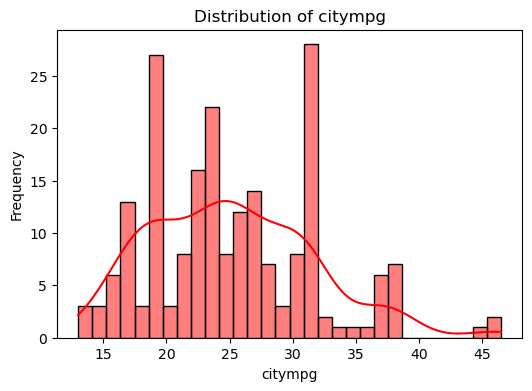

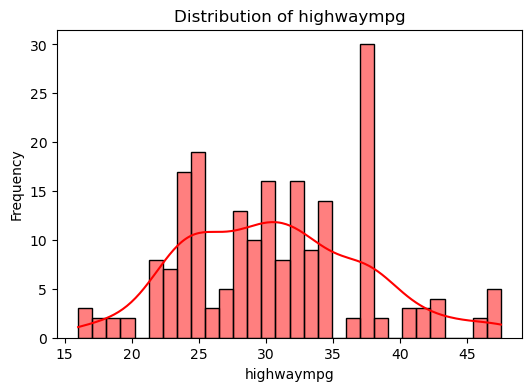

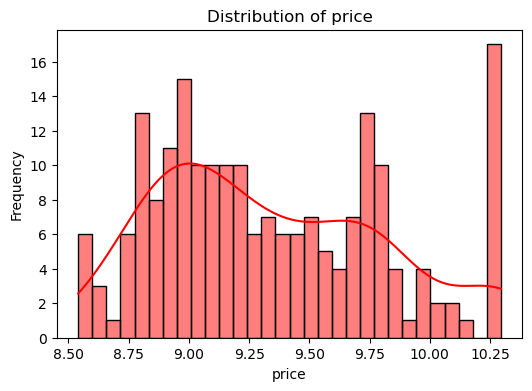

In [69]:
# Plot distribution for numerical column
for feature in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df1[feature], kde=True, bins=30, color='Red')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

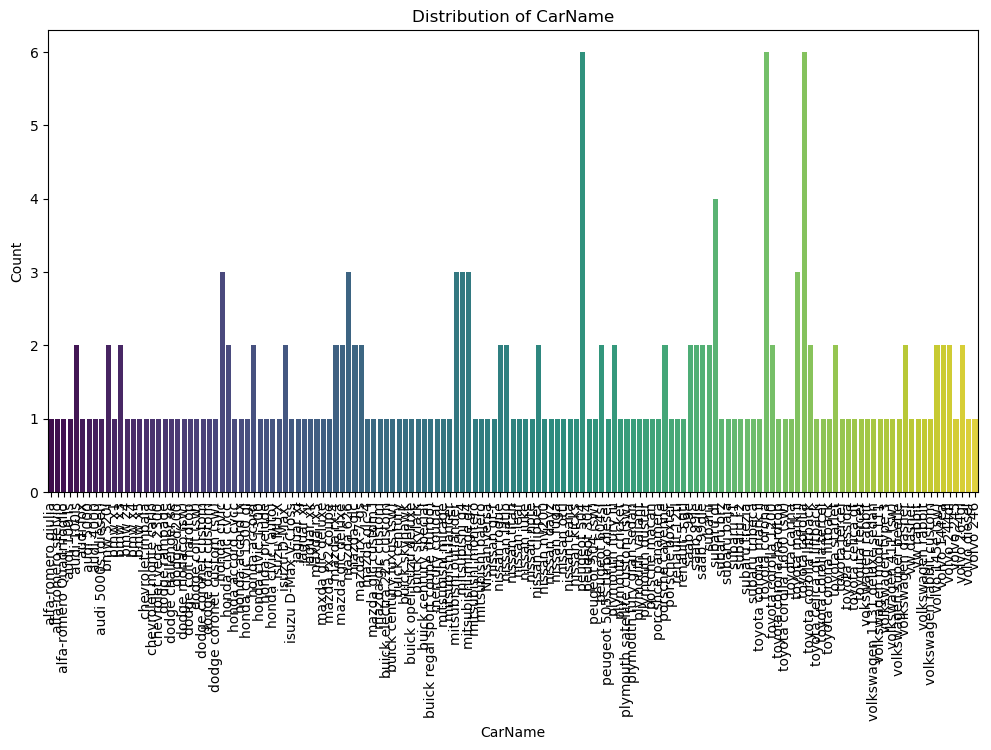

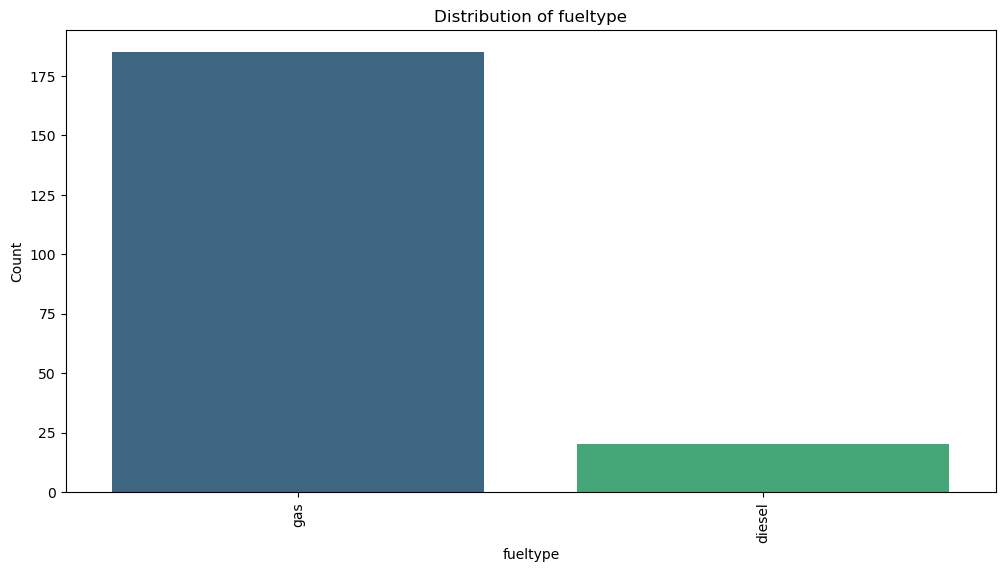

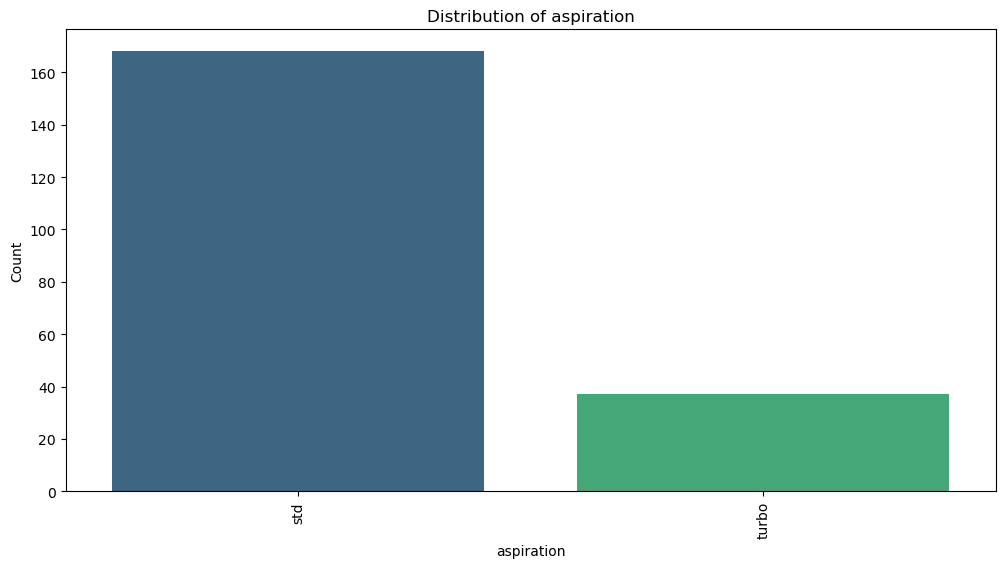

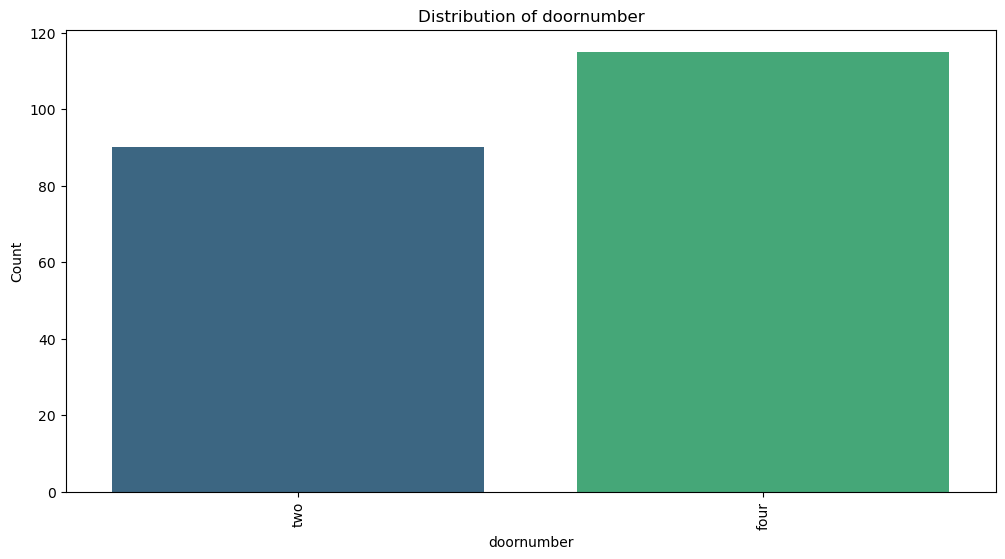

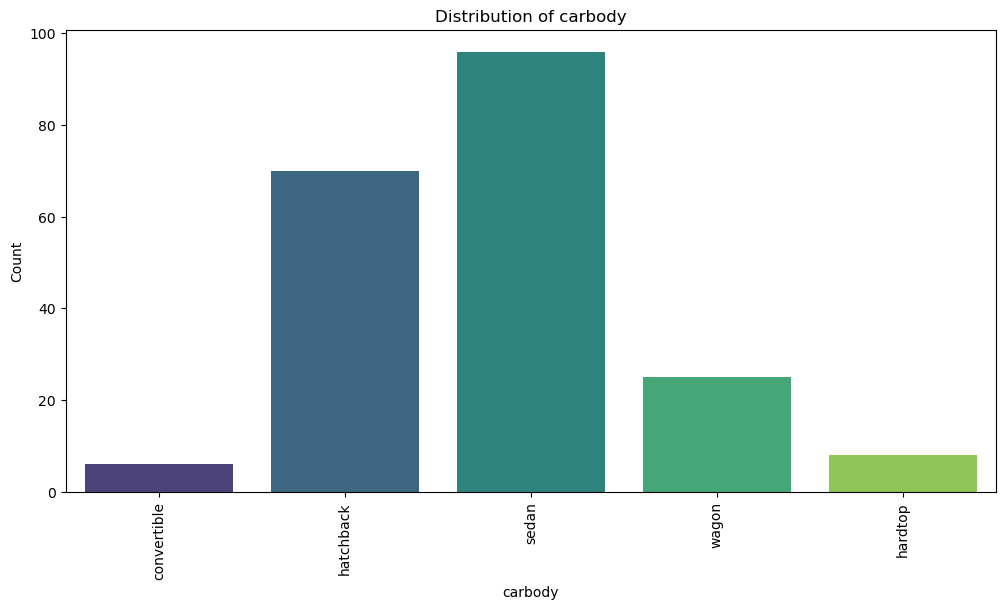

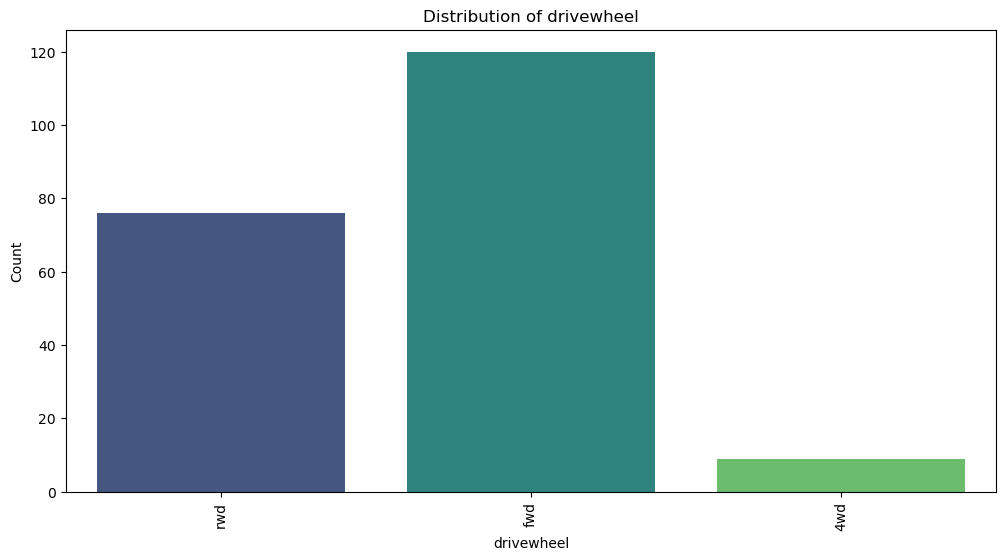

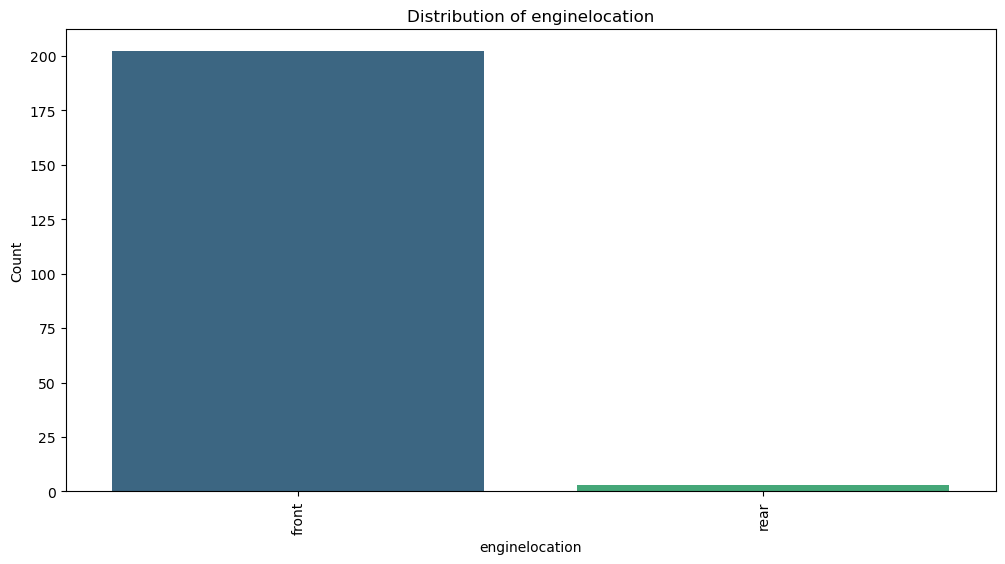

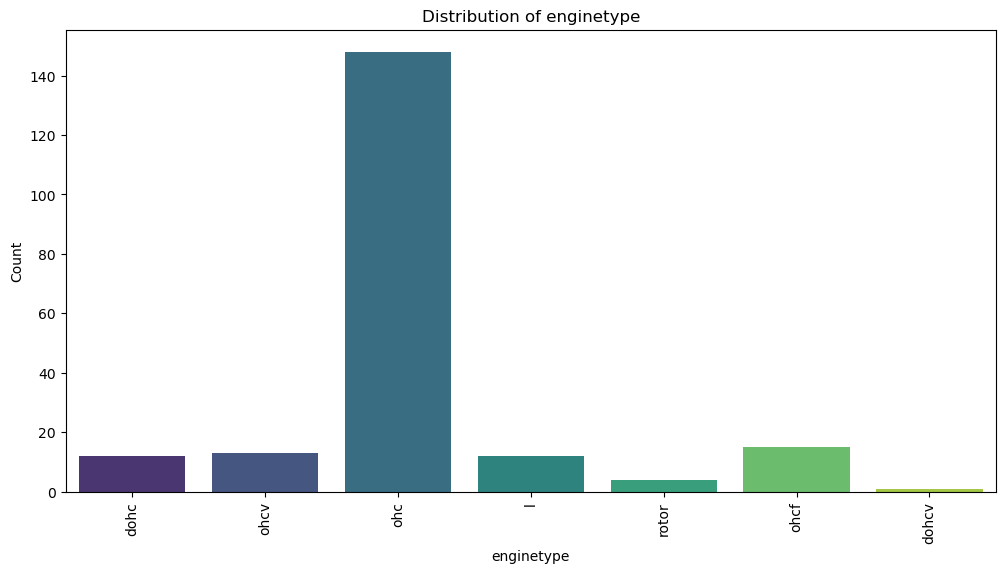

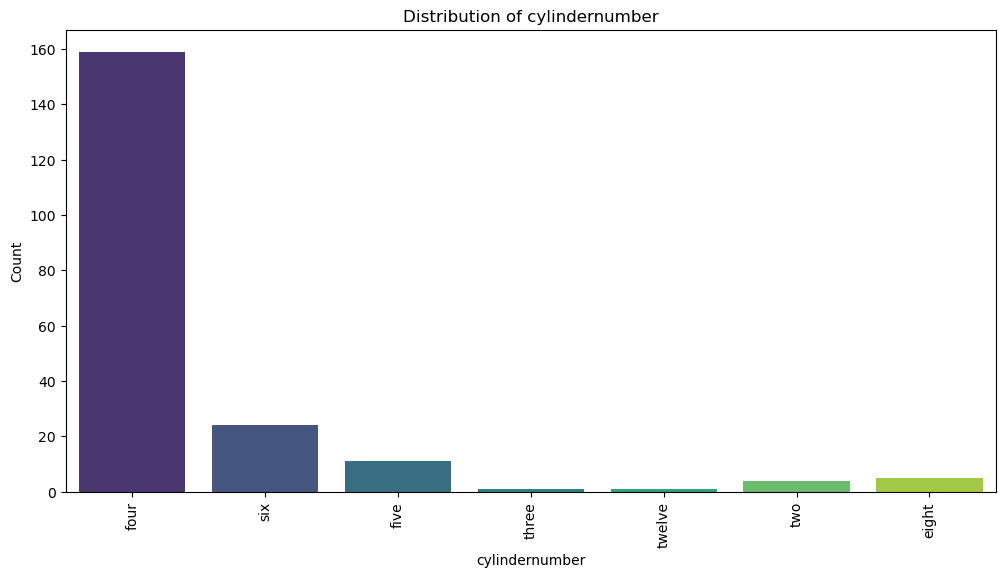

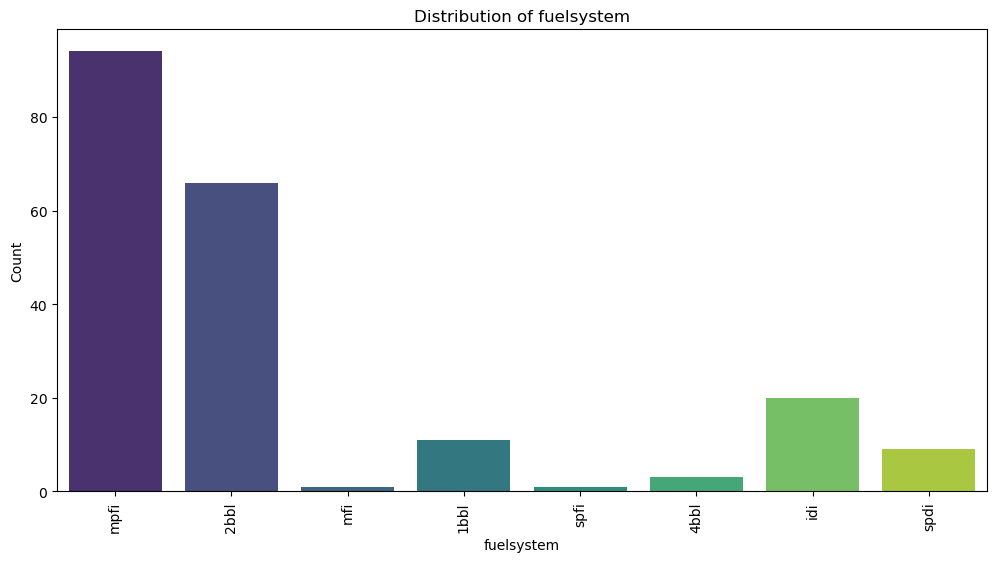

In [71]:
categorical_feature = df1.drop(numerical_columns, axis=1)

# Plot bar chart for each categorical feature
for feature in categorical_feature:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

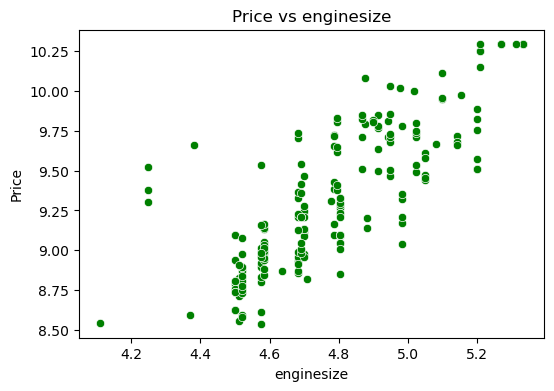

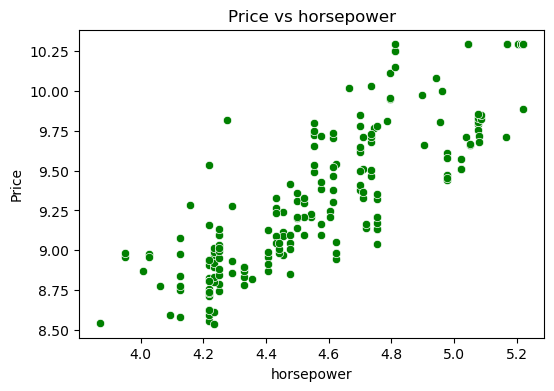

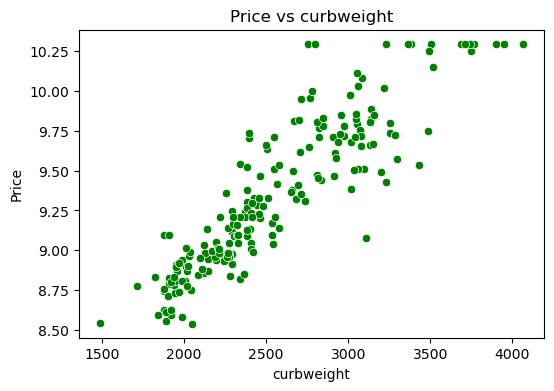

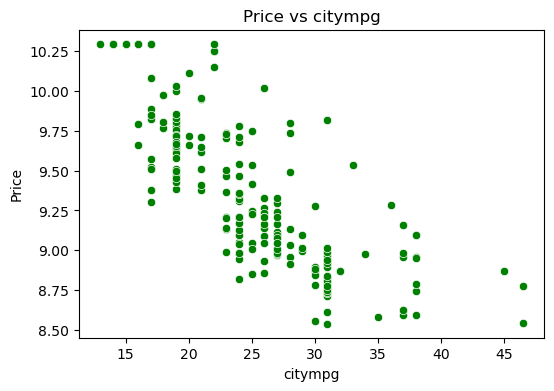

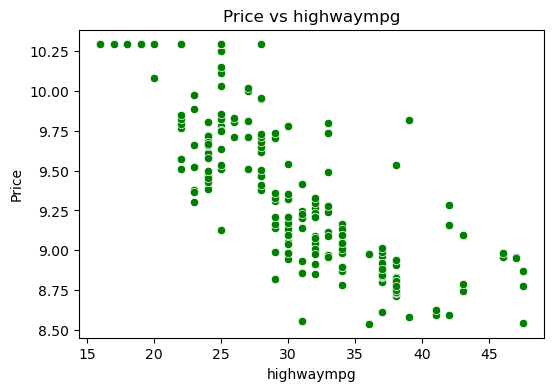

In [150]:
# Scatter plots for price vs numerical features
features_to_compare = ['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg']

for feature in features_to_compare:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['price'], color='green')
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

### 7. FEATURE ENGINEERING

LABEL ENCODING AND ONEHOT ENCODING

In [73]:
label_encoder = LabelEncoder()
df_label = df1.copy()
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.510075
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,2.117577,...,4.867534,mpfi,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.711116
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,2.132745,...,5.023881,mpfi,2.68,3.47,1.482304,5.036953,5000.0,19.0,26.0,9.711116
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,2.145500,...,4.691348,mpfi,3.19,3.40,1.517427,4.624973,5500.0,24.0,30.0,9.543235
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,2.144563,...,4.912655,mpfi,3.19,3.40,1.442027,4.744932,5500.0,18.0,22.0,9.767095


In [75]:
#label Encod
df_label['fueltype'] = label_encoder.fit_transform(df1['fueltype'])
df_label['aspiration'] = label_encoder.fit_transform(df1['aspiration'])
df_label['doornumber'] = label_encoder.fit_transform(df1['doornumber'])
df_label['carbody'] = label_encoder.fit_transform(df1['carbody'])
df_label['drivewheel'] = label_encoder.fit_transform(df1['drivewheel'])
df_label['enginelocation'] = label_encoder.fit_transform(df1['enginelocation'])
df_label['enginetype'] = label_encoder.fit_transform(df1['enginetype'])
df_label['cylindernumber'] = label_encoder.fit_transform(df1['cylindernumber'])
df_label['fuelsystem'] = label_encoder.fit_transform(df1['fuelsystem'])
df_label.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,2.117577,...,4.867534,5,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.510075
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,2.117577,...,4.867534,5,3.47,2.68,1.482304,4.709530,5000.0,21.0,27.0,9.711116
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,2.132745,...,5.023881,5,2.68,3.47,1.482304,5.036953,5000.0,19.0,26.0,9.711116
3,4,2,audi 100 ls,1,0,0,3,1,0,2.145500,...,4.691348,5,3.19,3.40,1.517427,4.624973,5500.0,24.0,30.0,9.543235
4,5,2,audi 100ls,1,0,0,3,0,0,2.144563,...,4.912655,5,3.19,3.40,1.442027,4.744932,5500.0,18.0,22.0,9.767095


In [77]:
# OneHot encoding

onehot = OneHotEncoder(sparse_output=False)
hot_encod = onehot.fit_transform(df_label[['CarName']])
hot_columns = onehot.get_feature_names_out(['CarName'])

In [79]:
# Creating DataFrame with onehot encoded columns
df_onehot = pd.concat([
    df_label,
    pd.DataFrame(hot_encod, columns=hot_columns)
], axis=1)

In [82]:
df_onehot.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit
0,1,3,alfa-romero giulia,1,0,1,0,2,0,2.117577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,2.117577,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,2.132745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2,audi 100 ls,1,0,0,3,1,0,2.145500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2,audi 100ls,1,0,0,3,0,0,2.144563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 173 entries, car_ID to CarName_vw rabbit
dtypes: float64(160), int32(9), int64(3), object(1)
memory usage: 270.0+ KB


In [86]:
# Dropping categorical values
df_onehot = df_onehot.drop('CarName',axis=1)

In [88]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 172 entries, car_ID to CarName_vw rabbit
dtypes: float64(160), int32(9), int64(3)
memory usage: 268.4 KB


#### SETTING Y AS TARGET

In [90]:
y = df_onehot['price']
y
x = df_onehot.drop(['price','car_ID'], axis=1)
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit
0,3,1,0,1,0,2,0,2.117577,168.8,4.160444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1,0,1,0,2,0,2.117577,168.8,4.160444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,1,2,2,0,2.132745,171.2,4.182050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,0,0,3,1,0,2.145500,176.6,4.192680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,1,0,0,3,0,0,2.144563,176.6,4.195697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,2.166164,188.8,4.232656,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,-1,1,1,0,3,2,0,2.166164,188.8,4.231204,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,-1,1,0,0,3,2,0,2.166164,188.8,4.232656,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
203,-1,0,1,0,3,2,0,2.166164,188.8,4.232656,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 8. FEATURE SELECTION

VARIANCE THRESHOLD

In [92]:
var_threshold = VarianceThreshold(threshold=0.5)
x_var = var_threshold.fit_transform(x)
var_selected = x.columns[var_threshold.get_support()].tolist()
print("1.Filter method results: ")
print("\na) Variance threshold")
print(f"Features selected: {len(var_selected)}")
print("Selected Features: ", var_selected[:12],"....")

1.Filter method results: 

a) Variance threshold
Features selected: 11
Selected Features:  ['symboling', 'carbody', 'carlength', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'fuelsystem', 'peakrpm', 'citympg', 'highwaympg'] ....


In [94]:
var_selected

['symboling',
 'carbody',
 'carlength',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'peakrpm',
 'citympg',
 'highwaympg']

### 9. FEATURE SCALING

In [96]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [98]:
# Applying  scaling method
x_standardized = standard_scaler.fit_transform(x_var)

In [100]:
# Converting to DataFrame
df_std = pd.DataFrame(x_standardized)
df_std.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.743470,-3.050975,-0.426521,-2.020417,-0.014566,-2.865105,-0.147475,0.869568,-0.262757,-0.649321,-0.552143
1,1.743470,-3.050975,-0.426521,-2.020417,-0.014566,-2.865105,-0.147475,0.869568,-0.262757,-0.649321,-0.552143
2,0.133509,-0.717207,-0.231513,-0.543527,0.514882,1.886890,1.112210,0.869568,-0.262757,-0.958163,-0.702161
3,0.938490,0.449677,0.207256,0.235942,-0.420797,-0.013908,-0.147475,0.869568,0.791357,-0.186058,-0.102086
4,0.938490,0.449677,0.207256,0.235942,0.516807,-0.013908,-1.407161,0.869568,0.791357,-1.112584,-1.302237


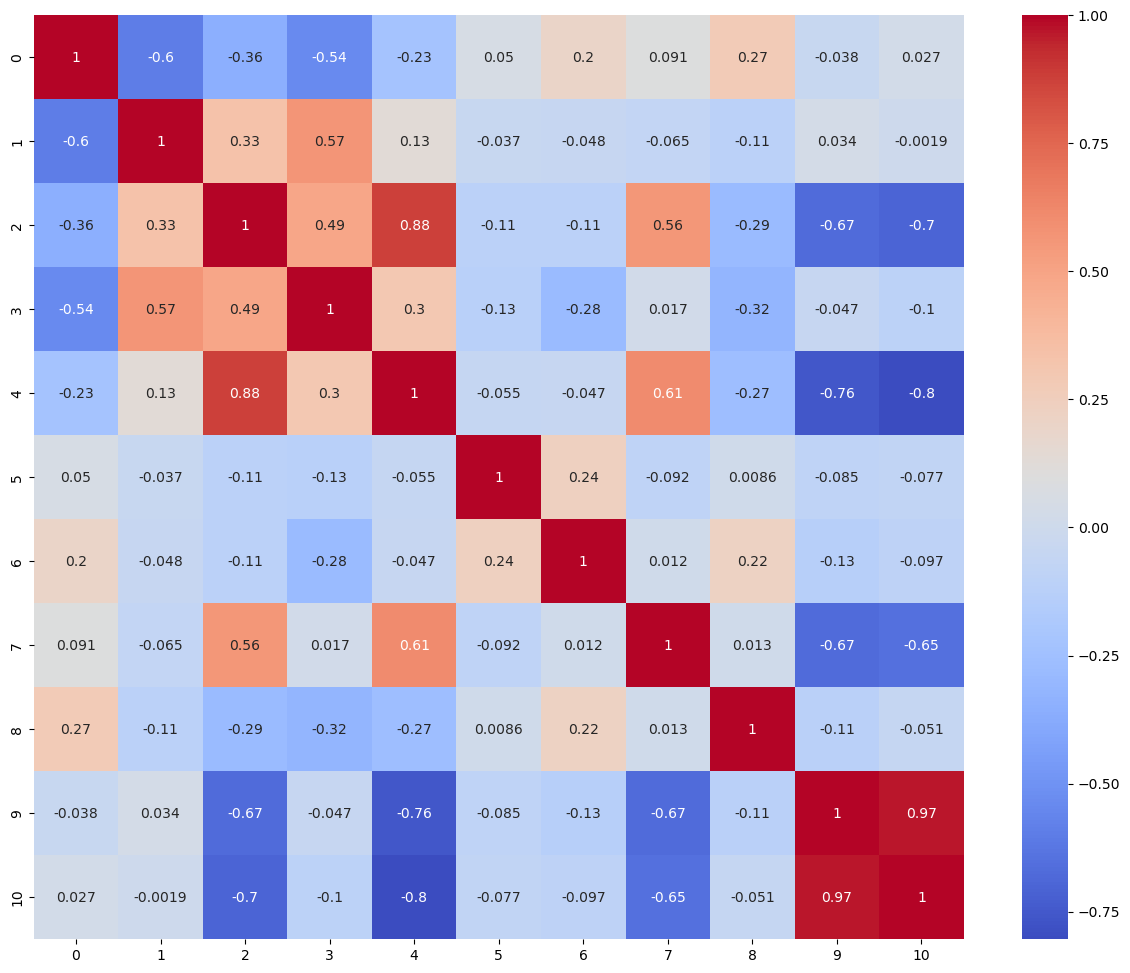

In [102]:
# Drawing Correlation
correlation = df_std.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

### 3. SPLITTING DATA FOR TRAINING AND TESTING

In [104]:
X_train, X_test, y_train, y_test = train_test_split(df_std, y, test_size=0.2, random_state=42)

### LINEAR REGRESSION

A simple and straightforward model, linear regression shows a linear relationship between one or more independent variables (features) and the dependent variable (target). To determine the best-fitting line, it minimizes the sum of squared residuals. It may perform poorly when relationships are complex or non-linear, even though it works well for datasets with linear trends.

### DECISION TREE REGRESSOR

A tree-based model called the Decision Tree Regressor divides the dataset into subsets according to feature values, resulting in a tree structure. While branches denote choices, each leaf represents a prediction. Though it may overfit the data and necessitate pruning or other regularization procedures, it is straightforward and capable of capturing non-linear correlations.

### RANDOM FOREST REGRESSOR

To increase prediction accuracy, the Random Forest Regressor is an ensemble learning technique that mixes several decision trees that have been trained on arbitrary subsets of the data and features. Although it improves robustness and decreases overfitting, it could be computationally costly for large datasets.

### GRADIANT BOOSTING REGRESSOR

Another ensemble technique called Gradient Boosting Regressor creates consecutive decision trees, each of which fixes the mistakes of the one before it. It provides flexibility through hyperparameter tuning and works incredibly well for intricate, non-linear connections. Nevertheless, it requires a lot of calculation and is susceptible to overfitting if not adjusted appropriately.

### SUPPORT VECTOR REGRESSOR (SVR)

SVR finds the hyperplane that best correlates with the data within a tolerance margin by applying the concepts of Support Vector Machines. When used with kernels, it is particularly effective for small-to medium-sized datasets with non-linear connections. Large datasets, however, could be difficult for it to handle, and careful parameter selection is necessary for best results.

## 11. BUILDING MODELS

In [106]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf')
}

In [108]:
# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Store results
    results[name] = {
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse
    }

## 12. MODEL EVALUATION RESULT 

In [110]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                             R² Score       MAE      RMSE
Linear Regression            0.825697  0.161574  0.201772
Decision Tree Regressor      0.744972  0.170912  0.244063
Random Forest Regressor      0.876245  0.136639  0.170016
Gradient Boosting Regressor  0.891191  0.133739  0.159419
Support Vector Regressor     0.790854  0.177862  0.221020


### VISUAISATION

In [112]:
# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
    plt.title(f'Actual vs Predicted Prices: {model_name}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid(True)
    plt.show()

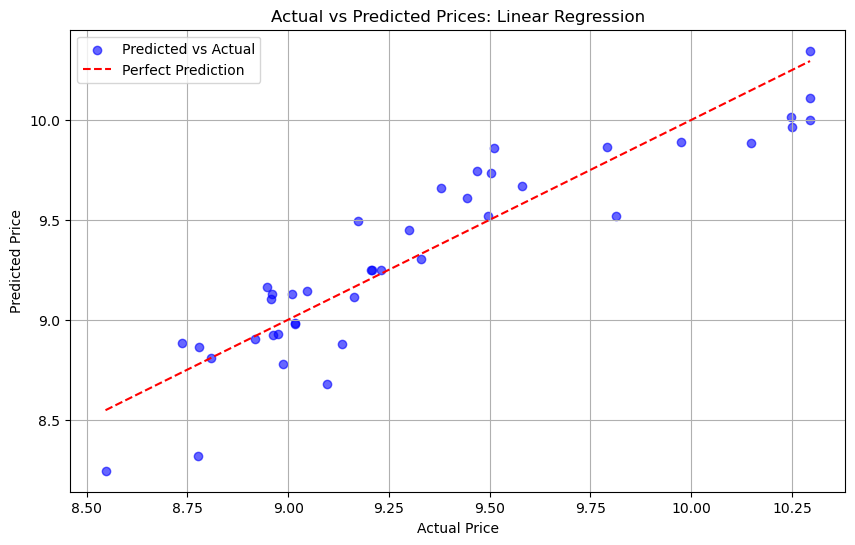

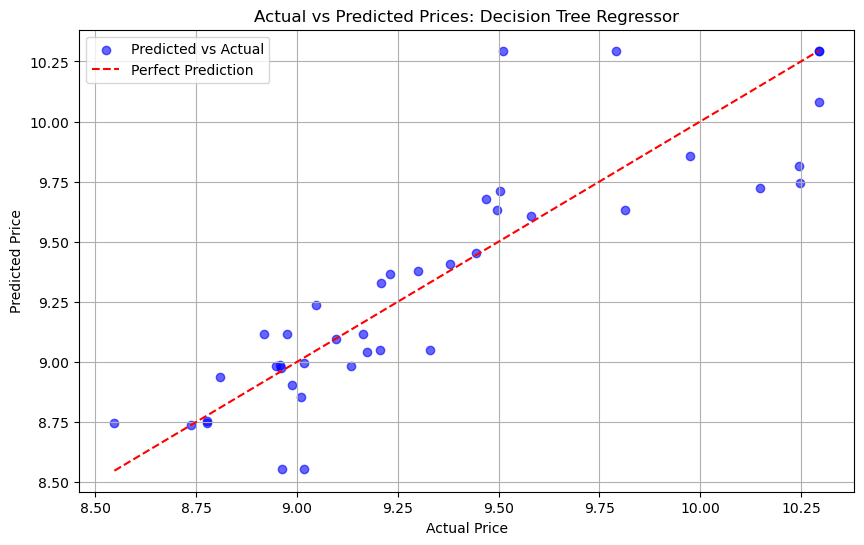

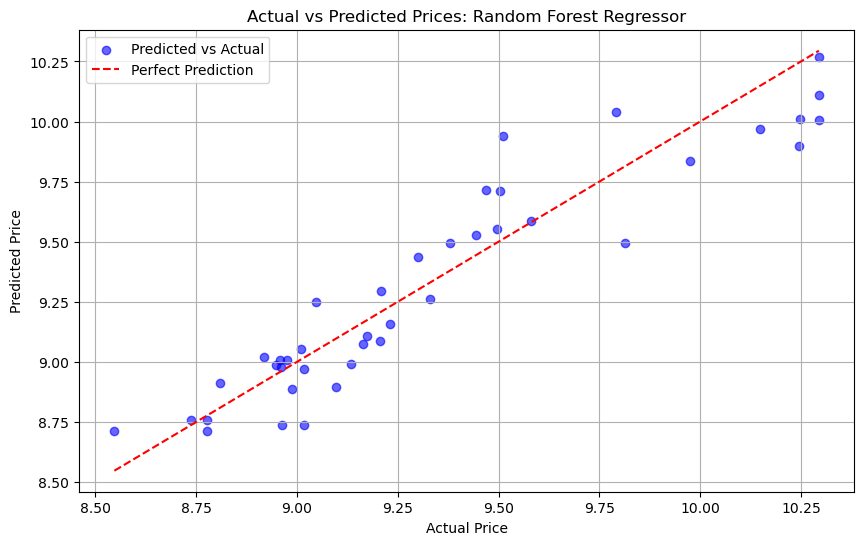

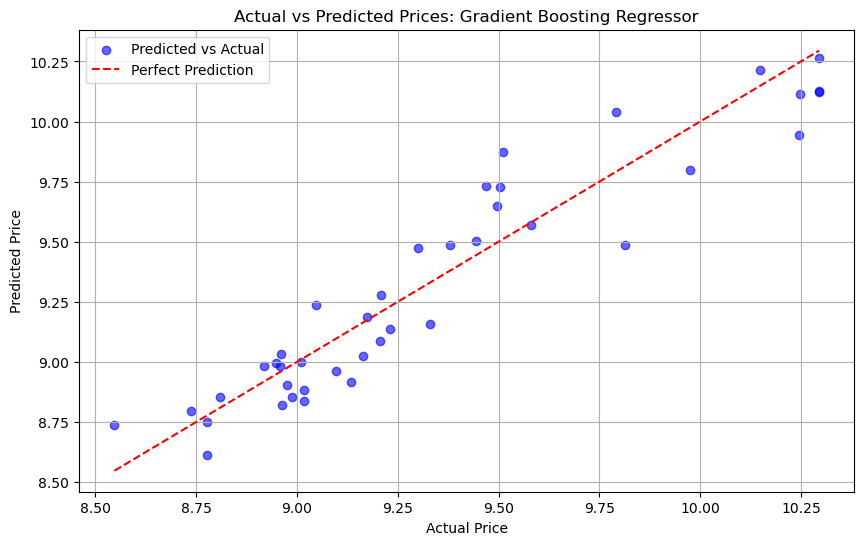

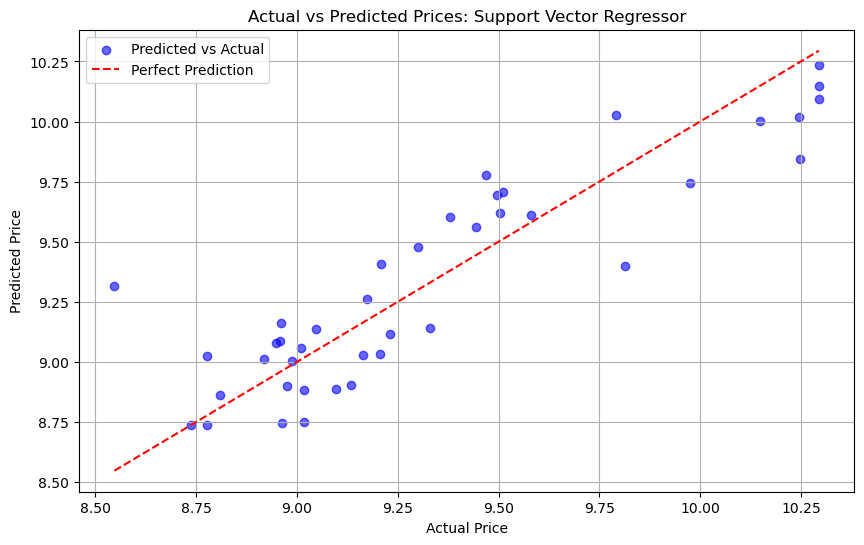

In [114]:
# Iterate through models to plot predictions
for name, model in models.items():
    # Generate predictions for the test set
    y_pred = model.predict(X_test)
    
    # Call the plotting function
    plot_actual_vs_predicted(y_test, y_pred, name)

In [116]:
# Find the best model based on R² Score
best_model_name = results_df['R² Score'].idxmax()
best_model_metrics = results_df.loc[best_model_name]

print(f"Best Model: {best_model_name}")
print("\nPerformance Metrics:")
print(best_model_metrics)

Best Model: Gradient Boosting Regressor

Performance Metrics:
R² Score    0.891191
MAE         0.133739
RMSE        0.159419
Name: Gradient Boosting Regressor, dtype: float64


In [118]:
# Rank models by R² Score
ranked_models = results_df.sort_values(by='R² Score', ascending=False)
print("Ranked Models by R² Score:")
print(ranked_models)

Ranked Models by R² Score:
                             R² Score       MAE      RMSE
Gradient Boosting Regressor  0.891191  0.133739  0.159419
Random Forest Regressor      0.876245  0.136639  0.170016
Linear Regression            0.825697  0.161574  0.201772
Support Vector Regressor     0.790854  0.177862  0.221020
Decision Tree Regressor      0.744972  0.170912  0.244063


In [120]:
# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.6}
Best R² Score: 0.8970872363382394


In [122]:
# Use the best estimator for predictions
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

# Evaluate on the test set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nTest Set Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Test Set Performance:
R² Score: 0.9089
MAE: 0.12
RMSE: 0.15


### SAVIND THE MODEL

In [124]:
# Save the model to a file
joblib.dump(best_gbr, 'car_price_prediction_gb_model.joblib')
print("Model saved as 'car_price_prediction_gb_model.joblib'")

Model saved as 'car_price_prediction_gb_model.joblib'


### CONCLUSION

Final Views: The business can benefit from the practical insights into the dynamics of car prices that the Gradient Boosting Regressor model offers
Create automobiles that adhere to certain budgetary constraints. Plan your pricing strategy according to the key factors that affect the cost. This project illustrates the usefulness of machine learning in obtaining business insights and shows how to solve regression problems in an organized manner.